In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Restaurant_Reviews.tsv", delimiter = '\t', quoting = 3)

In [3]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mshariatmadari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1].values

In [6]:
X, X.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64), (1000, 1500))

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()

accuracy = (tn + tp) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * precision * recall / (precision + recall)

print('Accuracy = ', accuracy)
print('Precision = ', round(precision,2))
print('Recall = ', round(recall,2))
print('F1 Score = ', round(f1_score,2))

Accuracy =  0.73
Precision =  0.68
Recall =  0.88
F1 Score =  0.77


In [18]:
from sklearn. import  
classifier = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

(cm[0][0] + cm[1][1]) / cm.sum(), cm

(0.61, array([[74, 23],
        [55, 48]]))

In [10]:
text_positive = ''.join(list(pd.DataFrame(corpus, columns=['Review'])[dataset['Liked'] == 1]['Review']))
text_negative = ''.join(list(pd.DataFrame(corpus, columns=['Review'])[dataset['Liked'] == 0]['Review']))

from wordcloud import WordCloud
wordcloud_pos = WordCloud(max_font_size = 50, max_words = 100, background_color = "white")
wordcloud_pos.generate(text_positive);
wordcloud_neg = WordCloud(max_font_size = 50, max_words = 100, background_color = "white")
wordcloud_neg.generate(text_negative);

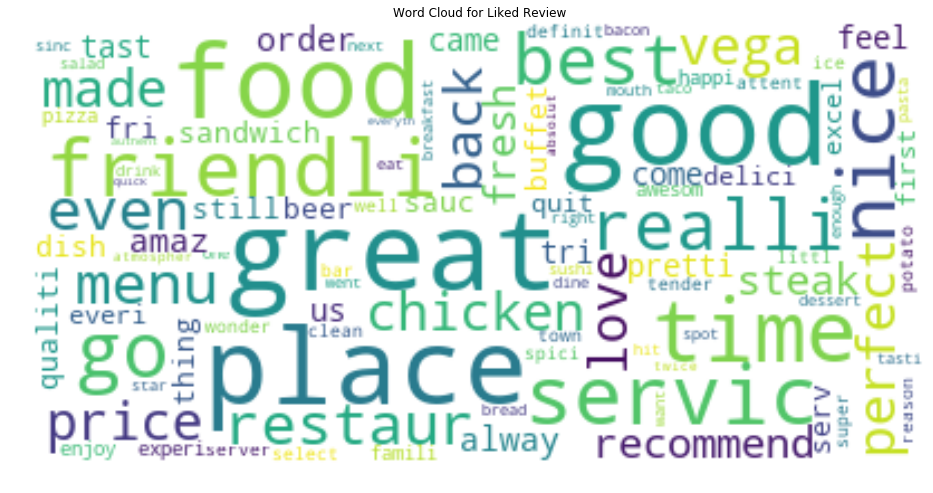

In [11]:
plt.figure(figsize = [16,9])
plt.imshow(wordcloud_pos, interpolation = 'bilinear')
plt.title('Word Cloud for Liked Review')
plt.axis("off");

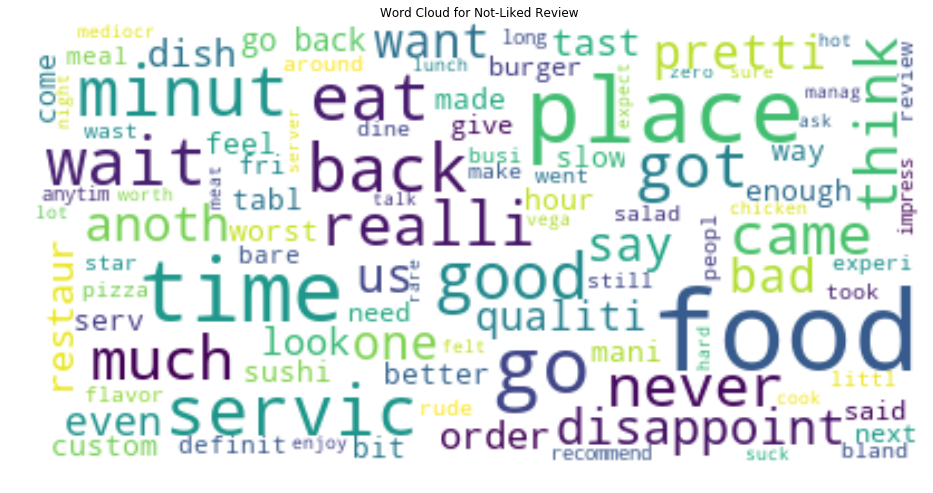

In [12]:
plt.figure(figsize = [16,9])
plt.imshow(wordcloud_neg, interpolation = 'bilinear')
plt.title('Word Cloud for Not-Liked Review')
plt.axis("off");